# Dataset info

### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
* 1 `school` - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
* 2 `sex` - student's sex (binary: "F" - female or "M" - male)
* 3 `age` - student's age (numeric: from 15 to 22)
* 4 `address` - student's home address type (binary: "U" - urban or "R" - rural)
* 5 `famsize` - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
* 6 `Pstatus` - parent's cohabitation status (binary: "T" - living together or "A" - apart)
* 7 `Medu` - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* 8 `Fedu` - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* 9 `Mjob` - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
* 10 `Fjob` - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
* 11 `reason` - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
* 12 `guardian` - student's guardian (nominal: "mother", "father" or "other")
* 13 `traveltime` - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* 14 `studytime` - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* 15 `failures` - number of past class failures (numeric: n if 1<=n<3, else 4)
* 16 `schoolsup` - extra educational support (binary: yes or no)
* 17 `famsup` - family educational support (binary: yes or no)
* 18 `paid` - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* 19 `activities` - extra-curricular activities (binary: yes or no)
* 20 `nursery` - attended nursery school (binary: yes or no)
* 21 `higher` - wants to take higher education (binary: yes or no)
* 22 `internet` - Internet access at home (binary: yes or no)
* 23 `romantic` - with a romantic relationship (binary: yes or no)
* 24 `famrel` - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* 25 `freetime` - free time after school (numeric: from 1 - very low to 5 - very high)
* 26 `goout` - going out with friends (numeric: from 1 - very low to 5 - very high)
* 27 `Dalc` - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* 28 `Walc` - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* 29 `health` - current health status (numeric: from 1 - very bad to 5 - very good)
* 30 `absences` - number of school absences (numeric: from 0 to 93)

# these grades are related with the course subject, Math or Portuguese:
* 31 `G1` - first period grade (numeric: from 0 to 20)
* 31 `G2` - second period grade (numeric: from 0 to 20)
* 32 `G3` - final grade (numeric: from 0 to 20, output target)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Define url connecting to my github repo where I have the datasets stored
math_performance_url = 'https://raw.githubusercontent.com/jacobalcu/StudentPerfEDA/refs/heads/main/student-mat.csv'
por_performance_url = 'https://raw.githubusercontent.com/jacobalcu/StudentPerfEDA/refs/heads/main/student-por.csv'

# Dataframe containing math performance
math_df = pd.read_csv(math_performance_url, sep=';')

# Dataframe containing portuguese performance
por_df = pd.read_csv(por_performance_url, sep=';')

math_df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
math_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [7]:
for col in math_df.columns:
  print(col, math_df[col].unique())

school ['GP' 'MS']
sex ['F' 'M']
age [18 17 15 16 19 22 20 21]
address ['U' 'R']
famsize ['GT3' 'LE3']
Pstatus ['A' 'T']
Medu [4 1 3 2 0]
Fedu [4 1 2 3 0]
Mjob ['at_home' 'health' 'other' 'services' 'teacher']
Fjob ['teacher' 'other' 'services' 'health' 'at_home']
reason ['course' 'other' 'home' 'reputation']
guardian ['mother' 'father' 'other']
traveltime [2 1 3 4]
studytime [2 3 1 4]
failures [0 3 2 1]
schoolsup ['yes' 'no']
famsup ['no' 'yes']
paid ['no' 'yes']
activities ['no' 'yes']
nursery ['yes' 'no']
higher ['yes' 'no']
internet ['no' 'yes']
romantic ['no' 'yes']
famrel [4 5 3 1 2]
freetime [3 2 4 1 5]
goout [4 3 2 1 5]
Dalc [1 2 5 3 4]
Walc [1 3 2 4 5]
health [3 5 1 2 4]
absences [ 6  4 10  2  0 16 14  7  8 25 12 54 18 26 20 56 24 28  5 13 15 22  3 21
  1 75 30 19  9 11 38 40 23 17]
G1 [ 5  7 15  6 12 16 14 10 13  8 11  9 17 19 18  4  3]
G2 [ 6  5  8 14 10 15 12 18 16 13  9 11  7 19 17  4  0]
G3 [ 6 10 15 11 19  9 12 14 16  5  8 17 18 13 20  7  0  4]


# Overall Distribution of Grades for G1, G2, and G3

## Histograms

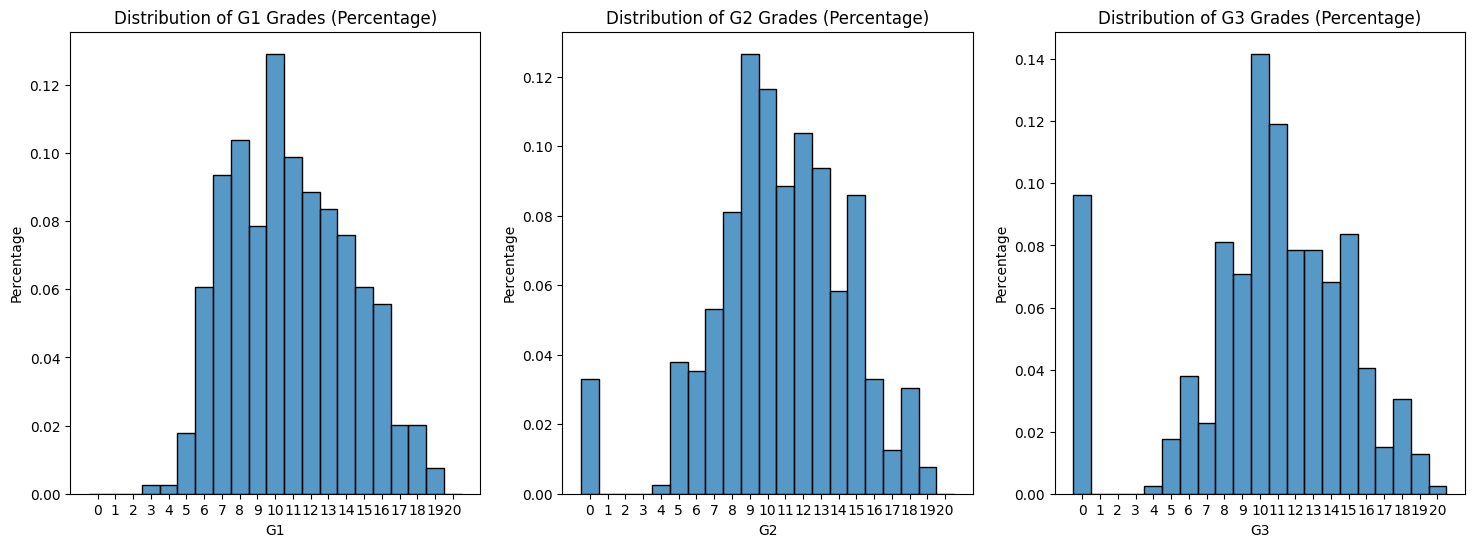

In [38]:
plt.figure(figsize=(18,6))

plt.subplot(1, 3, 1)
sns.histplot(math_df['G1'], bins=range(0, 22), stat='density') # Use density to get proportions
plt.xticks([i + 0.5 for i in range(0, 21)], range(0, 21)) # Set x-axis ticks to be the integer grades in the middle of the bins
plt.ylabel('Percentage') # Update y-axis label
plt.title('Distribution of G1 Grades (Percentage)') # Update title

plt.subplot(1, 3, 2)
sns.histplot(math_df['G2'], bins=range(0, 22), stat='density') # Use density to get proportions
plt.xticks([i + 0.5 for i in range(0, 21)], range(0, 21)) # Set x-axis ticks to be the integer grades in the middle of the bins
plt.ylabel('Percentage') # Update y-axis label
plt.title('Distribution of G2 Grades (Percentage)') # Update title

plt.subplot(1, 3, 3)
sns.histplot(math_df['G3'], bins=range(0, 22), stat='density') # Use density to get proportions
plt.xticks([i + 0.5 for i in range(0, 21)], range(0, 21)) # Set x-axis ticks to be the integer grades in the middle of the bins
plt.ylabel('Percentage') # Update y-axis label
plt.title('Distribution of G3 Grades (Percentage)') # Update title
plt.show()

## Box Plots

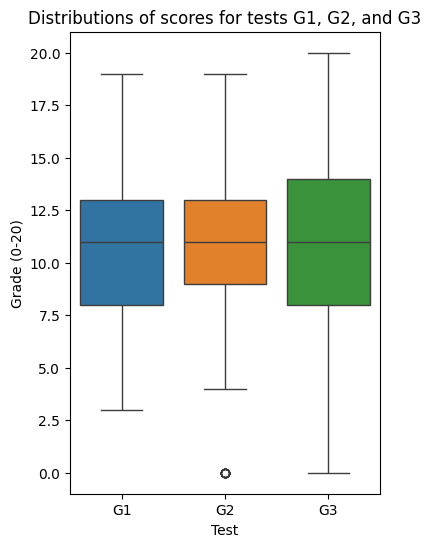

In [52]:
plt.figure(figsize=(4,6))

sns.boxplot(data=math_df[['G1', 'G2', 'G3']])
plt.ylabel('Grade (0-20)')
plt.xlabel('Test')
plt.title('Distributions of scores for tests G1, G2, and G3')
plt.show()

Summary:
* all of the tests seem pretty consistent.
* ~13% of students are scoring a 10
* main difference is the dramatic increase of students scoring 0's. 0% of G1 < ~3% of G2, ~10% of G3